In [127]:
# Dataset : https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?datasetId=310&searchQuery=anomaly
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [128]:
df = pd.read_csv("notebooks/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [129]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

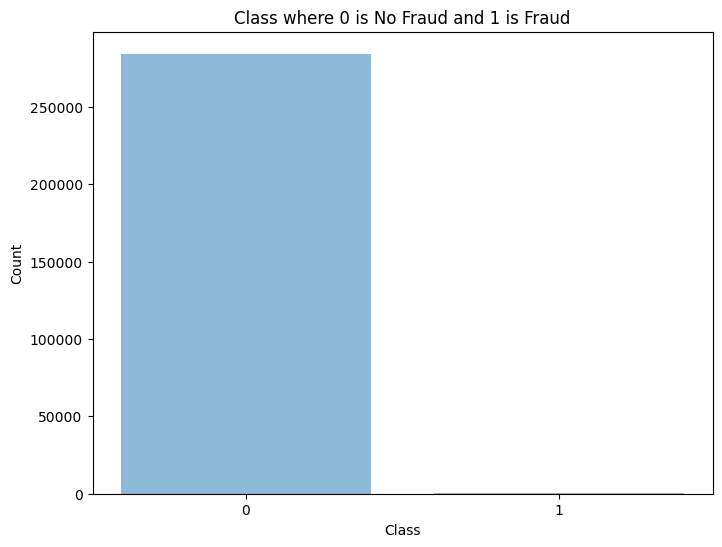

In [130]:
count = df['Class'].value_counts()
x_pos = count.index.astype(str)
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(x_pos, count, align='center', alpha=0.5)
plt.ylabel('Count')
plt.xlabel('Class')
plt.title('Class where 0 is No Fraud and 1 is Fraud')

plt.show()

In [77]:
# Feature Scaling
# Scaling the time and amount coulmns as other columns are already scaled. 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df['updated_amount'] = sc.fit_transform(df['Amount'].values.reshape(-1,1))
df['updated_time'] = sc.fit_transform(df['Time'].values.reshape(-1,1))
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,updated_amount,updated_time
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964,-1.996583
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475,-1.996583
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686,-1.996562
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534,-1.996562
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403,-1.996541


In [79]:
# Splitting and Sampling

from sklearn.model_selection import train_test_split
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

#count_fraud = df['Class'].value_counts()[1]
#print(count_fraud)
fraud = df.loc[df['Class'] == 1]
noFraud = df.loc[df['Class'] == 0][:len(fraud)]
balanced_df = pd.concat([fraud, noFraud])
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)
balanced_df = balanced_df.drop('Time' , axis = 1)
balanced_df = balanced_df.drop('Amount' , axis = 1)
balanced_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,updated_amount,updated_time
0,-0.427191,0.745708,1.761811,-0.165130,0.058298,-0.213413,0.647323,0.073464,-0.291864,0.064800,...,-0.432070,0.013164,0.161606,-0.401310,0.047423,0.102549,-0.116571,0,-0.316767,-1.994962
1,-0.613696,3.698772,-5.534941,5.620486,1.649263,-2.335145,-0.907188,0.706362,-3.747646,-4.230984,...,-0.471379,-0.075890,-0.667909,-0.642848,0.070600,0.488410,0.292345,1,-0.353229,1.243705
2,1.171439,0.474974,0.011761,1.264303,0.116234,-0.865986,0.554393,-0.276375,-0.471302,0.029104,...,0.278843,-0.097491,0.426278,0.744938,-0.274728,0.008472,0.015492,0,-0.273268,-1.993214
3,-6.682832,-2.714268,-5.774530,1.449792,-0.661836,-1.148650,0.849686,0.433427,-1.315646,-2.796332,...,1.187013,0.335821,0.215683,0.803110,0.044033,-0.054988,0.082337,1,0.595357,1.165033
4,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,3.578780,-4.684952,-8.537758,...,-0.451086,0.127214,-0.339450,0.394096,1.075295,1.649906,-0.394905,1,0.657967,-0.200658


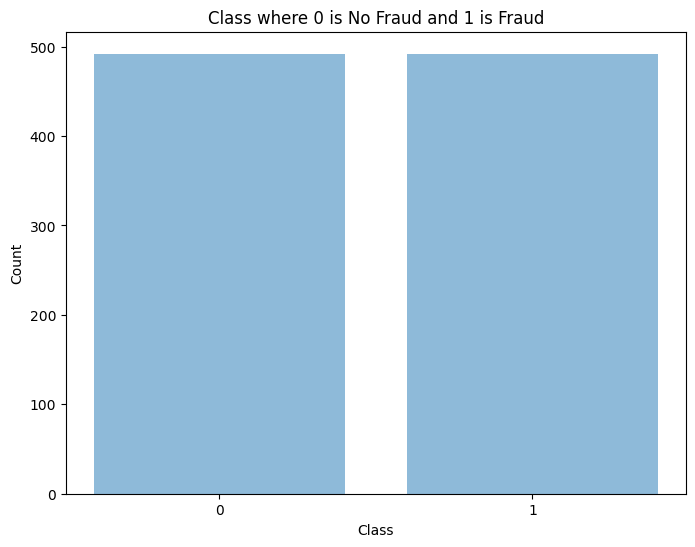

In [80]:
# Printing the balanced classes
count = balanced_df['Class'].value_counts()
x_pos = count.index.astype(str)
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(x_pos, count, align='center', alpha=0.5)
plt.ylabel('Count')
plt.xlabel('Class')
plt.title('Class where 0 is No Fraud and 1 is Fraud')

plt.show()

<AxesSubplot:>

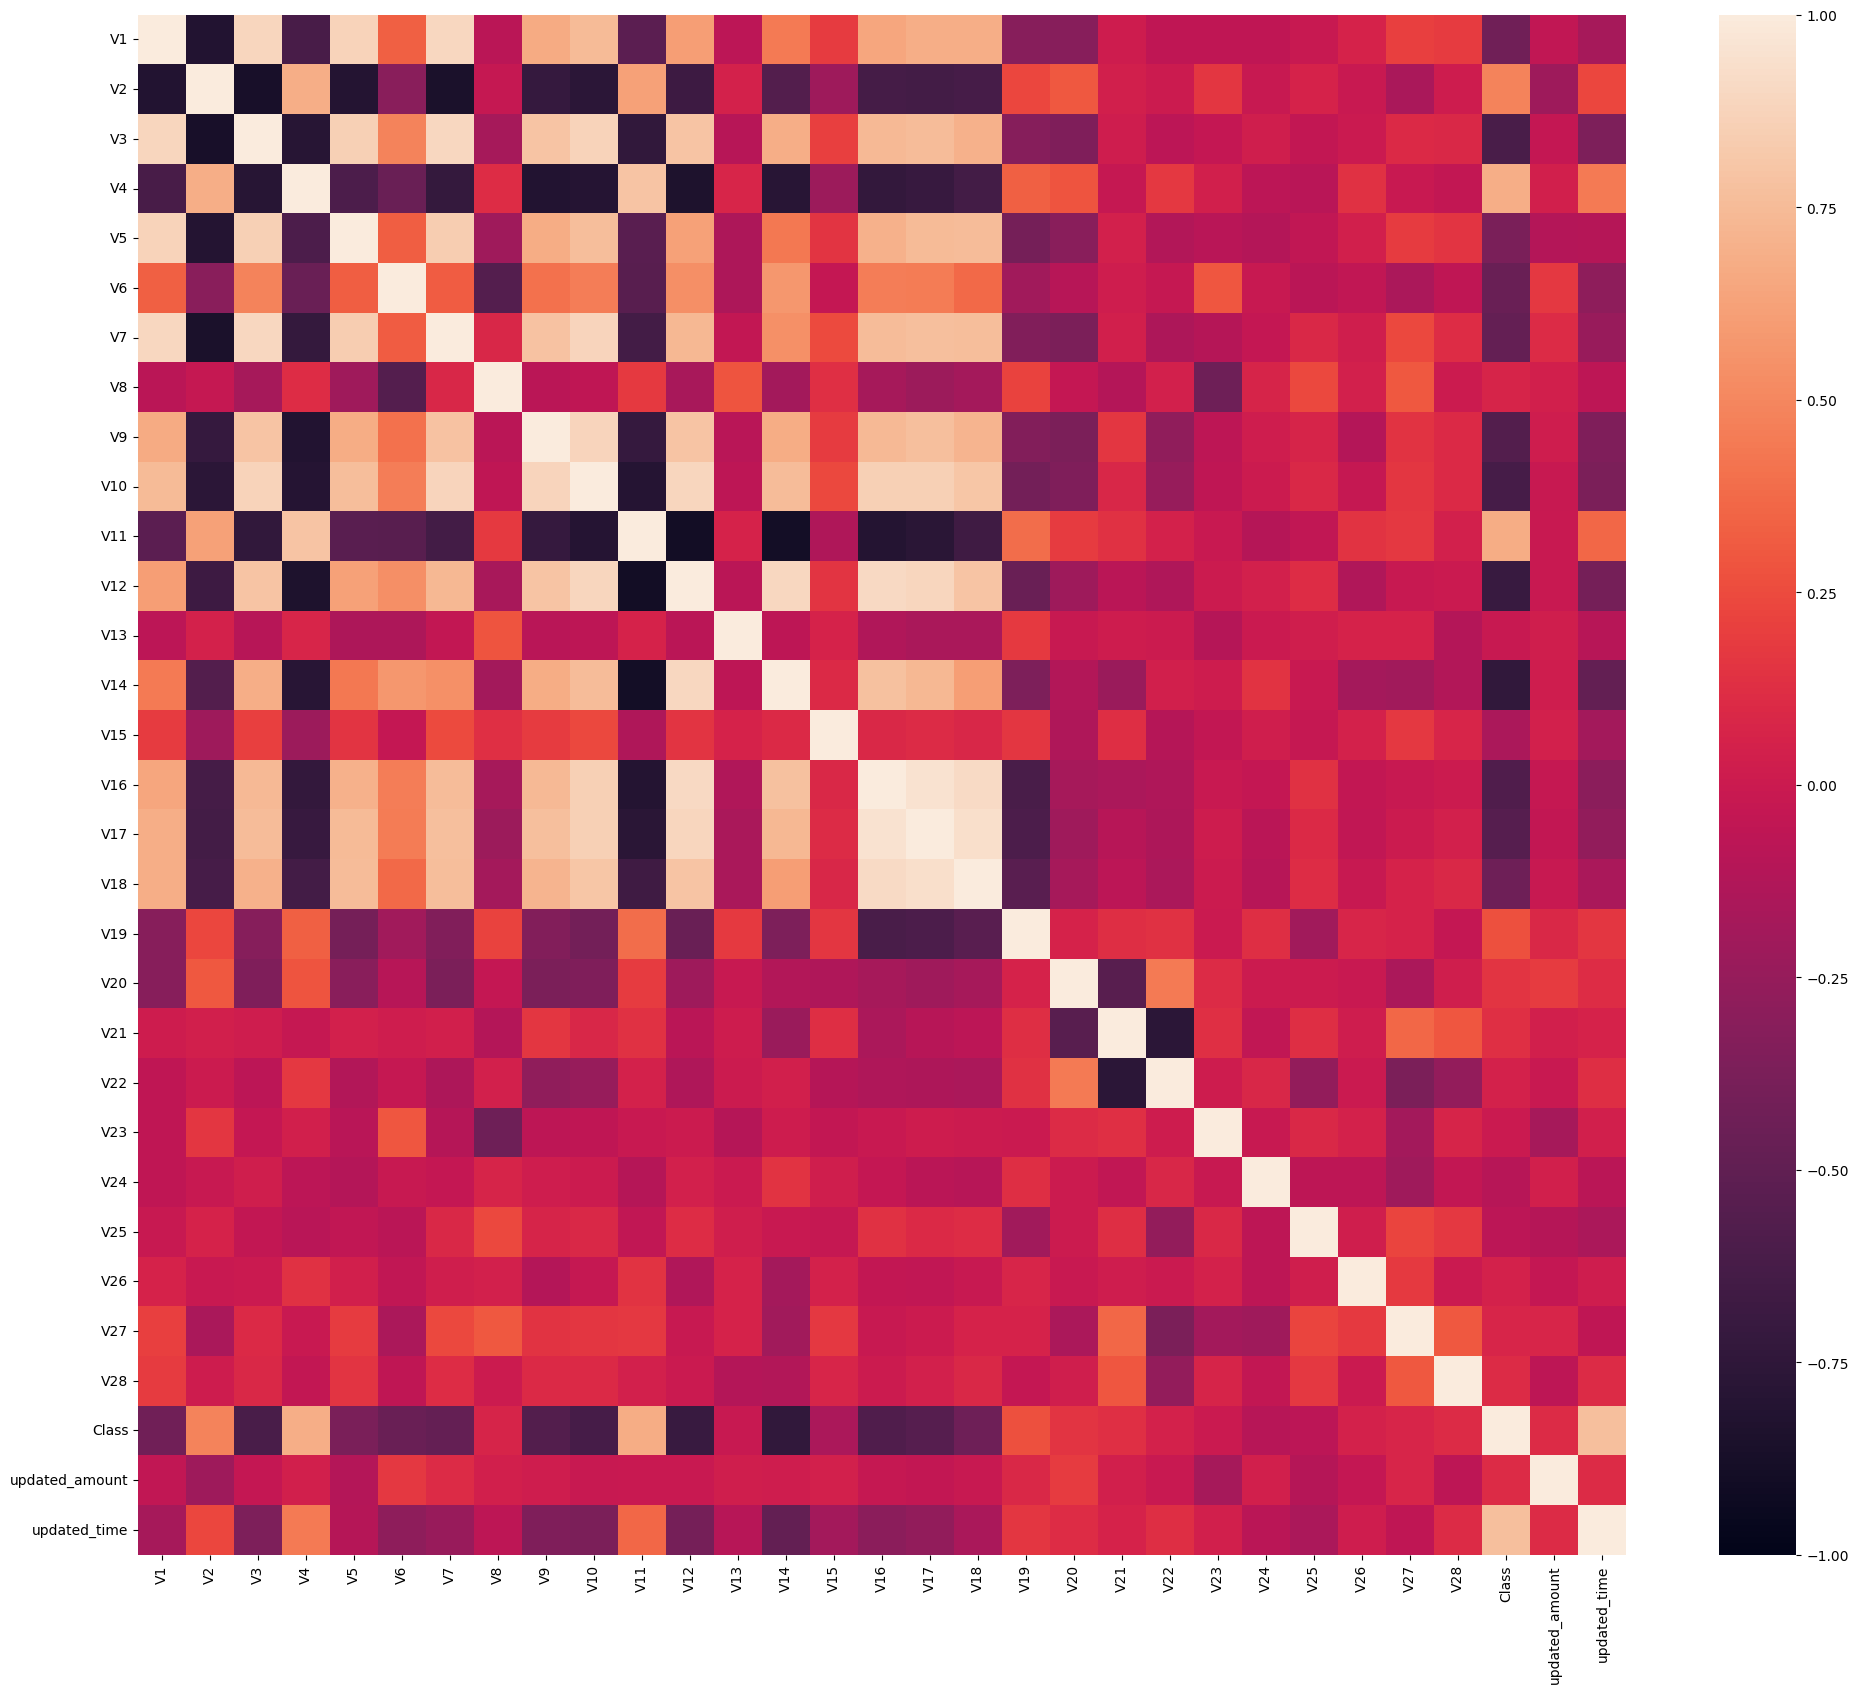

In [131]:
#%pip install seaborn
import seaborn as sns
f, (ax1) = plt.subplots(1, figsize=(24,20))
sns.heatmap(balanced_df.corr(),annot_kws={'size':20}, ax=ax1, vmin = -1, vmax = 1)

In [173]:
# Using the balanced dataset
Xb = balanced_df.drop('Class', axis = 1)
yb = balanced_df['Class']
X_btrain, X_btest, y_btrain, y_btest = train_test_split(Xb, yb, test_size=0.2, random_state=42)

In [174]:
print(X_btrain)

            V1        V2         V3        V4         V5        V6         V7  \
962 -12.833631  7.508790 -20.491952  7.465780 -11.575304 -5.140999 -14.020564   
762  -0.646513  1.004199   1.616224 -0.099628  -0.122477 -0.671327   0.656183   
334  -7.427924  2.948209  -8.678550  5.185303  -4.761090 -0.957095  -7.773380   
889   1.243848  0.524526  -0.538884  1.209196   0.479538 -0.197429   0.049166   
529  -1.309441  1.786495  -1.371070  1.214335  -0.336642 -1.390120  -1.709109   
..         ...       ...        ...       ...        ...       ...        ...   
106  -7.901421  2.720472  -7.885936  6.348334  -5.480119 -0.333059  -8.682376   
270  -2.207631  3.259076  -5.436365  3.684737  -3.066401 -0.671323  -3.696178   
860  -0.471796  0.523169   1.948967  0.995503   0.379069 -0.577466   0.521413   
435  -1.554216  1.694229  -0.903334  2.425436  -2.899787  0.133028  -0.286226   
102  -1.298359  1.079671  -0.180678  1.287839   1.858273 -2.223695   0.525167   

           V8        V9    

In [162]:
print(y_btrain)

962    1
762    0
334    1
889    1
529    1
      ..
106    1
270    1
860    0
435    1
102    1
Name: Class, Length: 787, dtype: int64


In [175]:
print(X_btest)

            V1         V2         V3        V4        V5        V6         V7  \
613  -0.887287   1.390002   1.219686  1.661425  1.009228 -0.733908   0.855829   
451  -3.613850  -0.922136  -4.749887  3.373001 -0.545207 -1.171301  -4.172315   
731  -0.913600   0.162262   0.541429 -1.931799  0.235402 -0.209263   0.770523   
436  -5.140723   3.568751  -5.896245  4.164720 -4.091193 -1.989960  -5.472436   
275 -13.192671  12.785971  -9.906650  3.320337 -4.801176  5.760059 -18.750889   
..         ...        ...        ...       ...       ...       ...        ...   
292  -0.948896   0.248414   2.956914  2.813750  0.145539 -0.027353   0.133702   
209  -0.264869   3.386140  -3.454997  4.367629  3.336060 -2.053918   0.256890   
506   1.954852   1.630056  -4.337200  2.378367  2.113348 -1.583851   0.653745   
49   -0.935732   0.170416   2.746261 -1.077965 -0.305594  0.011577  -0.296178   
717 -10.281784   6.302385 -13.271718  8.925115 -9.975578 -2.832513 -12.703253   

            V8        V9   

In [176]:
print(y_btest)

613    1
451    1
731    0
436    1
275    1
      ..
292    0
209    1
506    1
49     0
717    1
Name: Class, Length: 197, dtype: int64


In [170]:
X_btrain = X_btrain.values
X_btest = X_btest.values
y_btrain = y_btrain.values
y_btest = y_btest.values

In [171]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score

classifier_lr = LogisticRegression()
classifier_lr.fit(X_btrain, y_btrain)
training_score = cross_val_score(classifier_lr, X_btrain, y_btrain, cv=5)
print("LogisticRegression training accuracy score = " ,(training_score.mean()))

y_bpred = classifier_lr.predict(X_btest)
test_score = accuracy_score(y_btest, y_bpred)
print("LogisticRegression test accuracy score = ", test_score)

LogisticRegression training accuracy score =  0.9923728130291058
LogisticRegression test accuracy score =  0.9898477157360406


T-SNE took 9.1 s


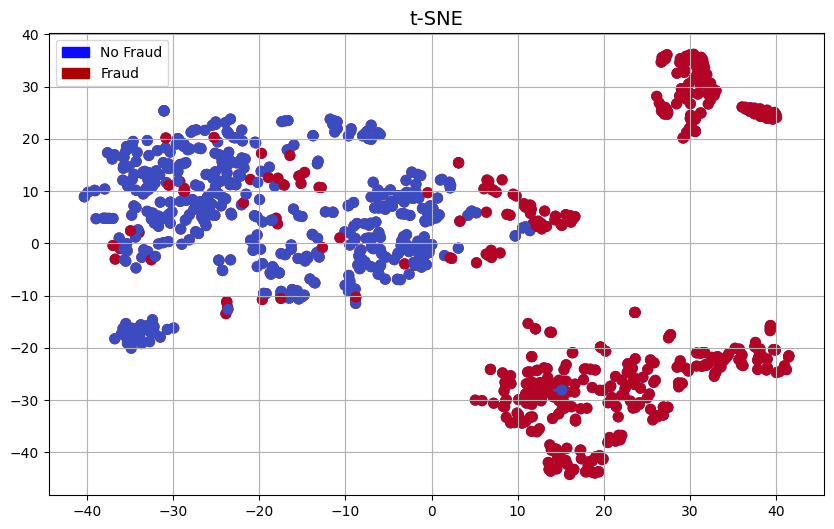

In [172]:
import matplotlib.patches as mpatches
import time

t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

f, (ax1) = plt.subplots(1,figsize=(10,6))

# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])
plt.show()

In [169]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

classifier_kn = KNeighborsClassifier()
classifier_kn.fit(X_btrain, y_btrain)
training_score = cross_val_score(classifier_kn, X_btrain, y_btrain, cv=5)
print("KNeighborsClassifier training accuracy score = " , (training_score.mean()))

y_bpred = classifier_kn.predict(X_btest)
test_score = accuracy_score(y_btest, y_bpred)
print("KNeighborsClassifier test accuracy score = ", test_score)

classifier_svc = SVC()
classifier_svc.fit(X_btrain, y_btrain)
training_score = cross_val_score(classifier_svc, X_btrain, y_btrain, cv=5)
print("SVC training accuracy score = " , (training_score.mean()))

y_bpred = classifier_svc.predict(X_btest)
test_score = accuracy_score(y_btest, y_bpred)
print("SVC test accuracy score = ", test_score)

KNeighborsClassifier training accuracy score =  0.9542852535676852
KNeighborsClassifier test accuracy score =  0.9441624365482234
SVC training accuracy score =  0.9606466177537692
SVC test accuracy score =  0.9593908629441624
